In [19]:
#pandas/seaborn
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
#Df
dfcalificaciones = pd.read_csv ('calificaciones.csv')
dfcarrera = pd.read_csv ('carrera.csv')
dfescuelas = pd.read_csv ('escuelas.csv')
dfestudiantes= pd.read_csv ('estudiantes.csv')

In [21]:
#Calificaciones
dfcalificaciones.head()

,periodo,clave_alumno,clave_materia,calificacion,tipo_calificacion
0,2001,0,ACB9309,100.0,1
1,2001,0,ACH9322,75.0,1
2,2001,0,ACM9313,0.0,3
3,2001,0,ACM9301,0.0,3
4,2001,0,ACC9326,93.0,1


In [22]:
#Carrera
dfcarrera.head()

,clave_carrera,nombre,corto
0,0,INGENIERIA INDUSTRIAL,Industrial
1,1,INGENIERIA BIOQUIMICA,Bioquimica
2,2,INGENIERIA MECANICA,Mecanica
3,3,INGENIERIA ELECTRICA,Electrica
4,4,INGENIERIA ELECTRONICA,Electronica


In [23]:
#Escuelas
dfescuelas.head()

,clave,escuela
0,3,COBAES 3(PROFRA. VELINA LEON )
1,4,COBAES 4(PROFR. VICTOR M. RUB)
2,5,COBAES 5(PROFRA. FCA. GUERRER)
3,6,COBAES 6(ING.JOSE HERNANDEZ T)
4,7,COBAES 7(GRAÑ. PABLO MACIAS V)


In [24]:
#Alumnos
dfestudiantes.head()

,clave_alumno,clave_carrera,sexo,prepa,colonia,municipio,ciudad,ingreso,termino,causa_salida
0,28,4,1,2,Los Angeles,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
1,248,4,1,125,FRAC.RINCON HYA,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
2,260,4,1,71,El Walamo,25006.0,"CULIACAN, SIN.",2003.0,2061.0,5
3,261,4,1,107,4 de Marzo,25006.0,"CULIACAN, SIN.",2003.0,2051.0,4
4,262,4,2,2,Los Angeles,25006.0,CULIACAN,2003.0,2053.0,5


Promedio por Sexo por Carrera

In [25]:
#Union de calificaciones con estudiantes
df=dfcalificaciones.merge(dfestudiantes, on='clave_alumno')

In [26]:
#Carreras
df=df.merge(dfcarrera, on='clave_carrera')

In [27]:
#Calificaciones validas
dfCalfValidas=df[df['tipo_calificacion']==1]

In [28]:
#Carrera, sexo y promedio
promedio=dfCalfValidas.groupby(['corto','sexo'])['calificacion'].mean().reset_index()

In [29]:
#Tabla promedios
promedio.columns=['Carrera', 'Sexo', 'Promedio']

In [30]:
#Mapear sexo o texto
promedio['Sexo'] = promedio['Sexo'].map({1: 'Hombre', 2: 'Mujer'})

In [31]:
#Imprimir tabla promedios
print(promedio)

        Carrera    Sexo   Promedio
0    Bioquimica  Hombre  87.182523
1    Bioquimica   Mujer  89.892341
2     Electrica  Hombre  83.953852
3     Electrica   Mujer  87.233400
4   Electronica  Hombre  85.686848
5   Electronica   Mujer  88.465534
6    Industrial  Hombre  87.718999
7    Industrial   Mujer  91.493934
8   Informatica  Hombre  86.247141
9   Informatica   Mujer  88.916365
10     Mecanica  Hombre  85.058768
11     Mecanica   Mujer  88.732782
12  Mecatronica  Hombre  87.472334
13  Mecatronica   Mujer  90.692740
14     Sistemas  Hombre  85.275790
15     Sistemas   Mujer  88.359288
16          TIC  Hombre  77.994152
17          TIC   Mujer  81.883117


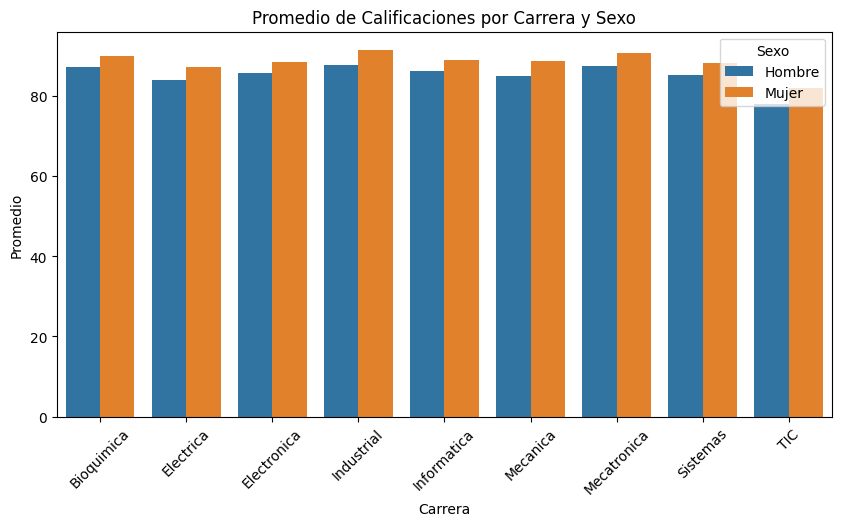

In [32]:
# Gráfico de barras
plt.figure(figsize=(10, 5))
sns.barplot(data=promedio, x='Carrera', y='Promedio', hue='Sexo')
plt.title('Promedio de Calificaciones por Carrera y Sexo')
plt.xticks(rotation=45)
plt.show()

# Cambio de promedios por semestre por carrera 
- gráfica de lineas
- promedio por carreras

# Poblacion estudiantil por año por cohorte
- cuantas personas hay por semestre en comparacion con cuantas hay en el semestre anterior. 
- cuantas tienen materias cargdas que enrtaron en comparacion con otros semestres.
- primero  hacer tabla
- por porcentaje o cantidad de personas

,cohorte,estudiantes,cambio_cant,cambio_pct
0,2002.0-2002.0,145,0,0.000000
1,2002.0-2011.0,19,-126,-86.896552
2,2002.0-2012.0,23,4,21.052632
3,2002.0-2021.0,15,-8,-34.782609
4,2002.0-2022.0,14,-1,-6.666667
...,...,...,...,...
220,2101.0-nan,137,120,705.882353
221,2103.0-2103.0,78,-59,-43.065693
222,2103.0-nan,1005,927,1188.461538
223,2111.0-nan,113,-892,-88.756219


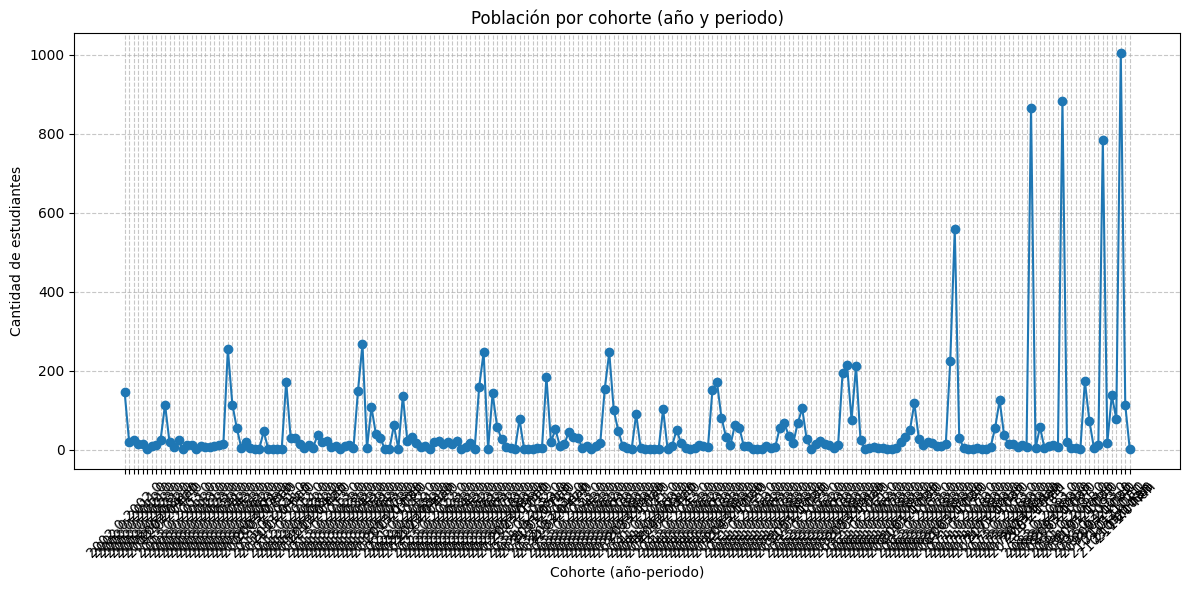

In [36]:
 # Análisis 4: Población anual por cohorte (ingreso + periodo)

# Crear columna de cohorte: año-ingreso + periodo (1, 2, 3)
dfestudiantes['cohorte'] = dfestudiantes['ingreso'].astype(str) + '-' + dfestudiantes['termino'].astype(str)

# Contar estudiantes por cohorte
cohorte_counts = dfestudiantes['cohorte'].value_counts().sort_index()

# Convertir a DataFrame
df_cohortes = cohorte_counts.reset_index()
df_cohortes.columns = ['cohorte', 'estudiantes']

# Calcular diferencias respecto al periodo anterior
df_cohortes['cambio_cant'] = df_cohortes['estudiantes'].diff().fillna(0).astype(int)
df_cohortes['cambio_pct'] = df_cohortes['estudiantes'].pct_change().fillna(0) * 100

# Mostrar tabla
display(df_cohortes)

# Gráfica de líneas para visualizar cambios
plt.figure(figsize=(12, 6))
plt.plot(df_cohortes['cohorte'], df_cohortes['estudiantes'], marker='o', label='Estudiantes')
plt.xticks(rotation=45)
plt.title('Población por cohorte (año y periodo)')
plt.xlabel('Cohorte (año-periodo)')
plt.ylabel('Cantidad de estudiantes')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Año con mayor población estudiantil

# Año con mayor ingreso

Año con mayor ingreso (sin bajas definitivas ni por especial): 2103.0 (1006 estudiantes)


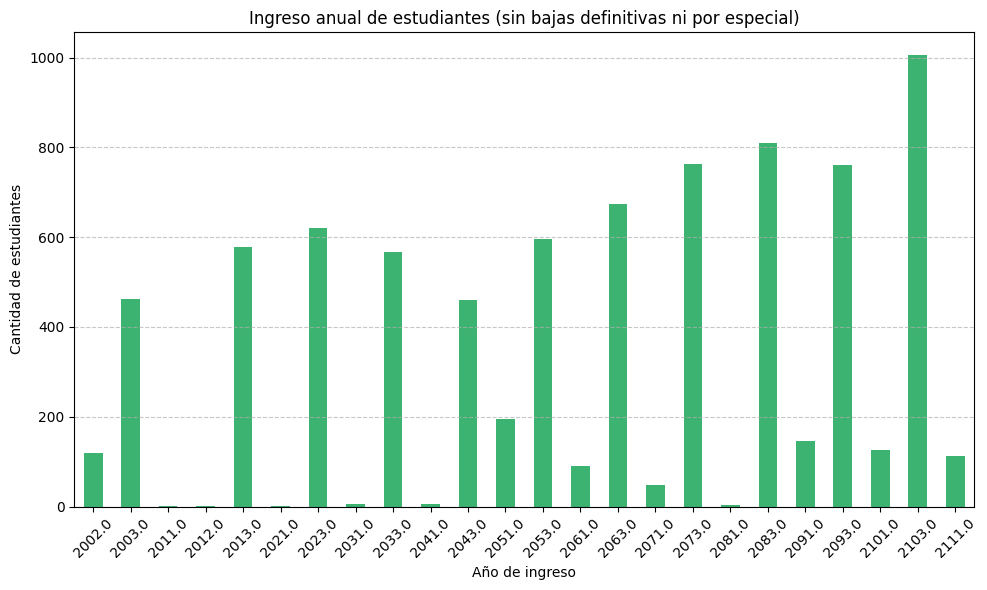

In [33]:
# Análisis 2: Año con mayor ingreso (sin bajas definitivas ni por especial/reprobado)

# Filtrar estudiantes con causa de salida diferente de 3 (baja por especial/reprobado) y 4 (baja definitiva)
df_ingresos_validos = dfestudiantes[~dfestudiantes['causa_salida'].isin([3, 4])]

# Agrupar por año de ingreso y contar
ingresos_por_anio = df_ingresos_validos['ingreso'].value_counts().sort_index()

# Mostrar el año con mayor ingreso
anio_max_ingreso = ingresos_por_anio.idxmax()
cantidad_max_ingreso = ingresos_por_anio.max()
print(f"Año con mayor ingreso (sin bajas definitivas ni por especial): {anio_max_ingreso} ({cantidad_max_ingreso} estudiantes)")

# Gráfica
plt.figure(figsize=(10, 6))
ingresos_por_anio.plot(kind='bar', color='mediumseagreen')
plt.title('Ingreso anual de estudiantes (sin bajas definitivas ni por especial)')
plt.xlabel('Año de ingreso')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Ingreso por año por carrera 

corto,Bioquimica,Electrica,Electronica,Industrial,Informatica,Mecanica,Mecatronica,Sistemas,TIC
ingreso,,,,,,,,,
2002.0,26,26,92,108,110,32,0,0,0
2003.0,25,40,91,183,199,73,0,0,0
2011.0,0,0,1,0,2,1,0,0,0
2012.0,19,41,79,45,76,43,0,0,0
2013.0,41,47,117,235,194,101,0,0,0
2021.0,0,0,1,1,0,0,0,0,0
2022.0,19,33,35,28,60,46,0,0,0
2023.0,48,73,166,257,203,112,0,0,0
2031.0,1,1,5,4,0,0,0,0,0


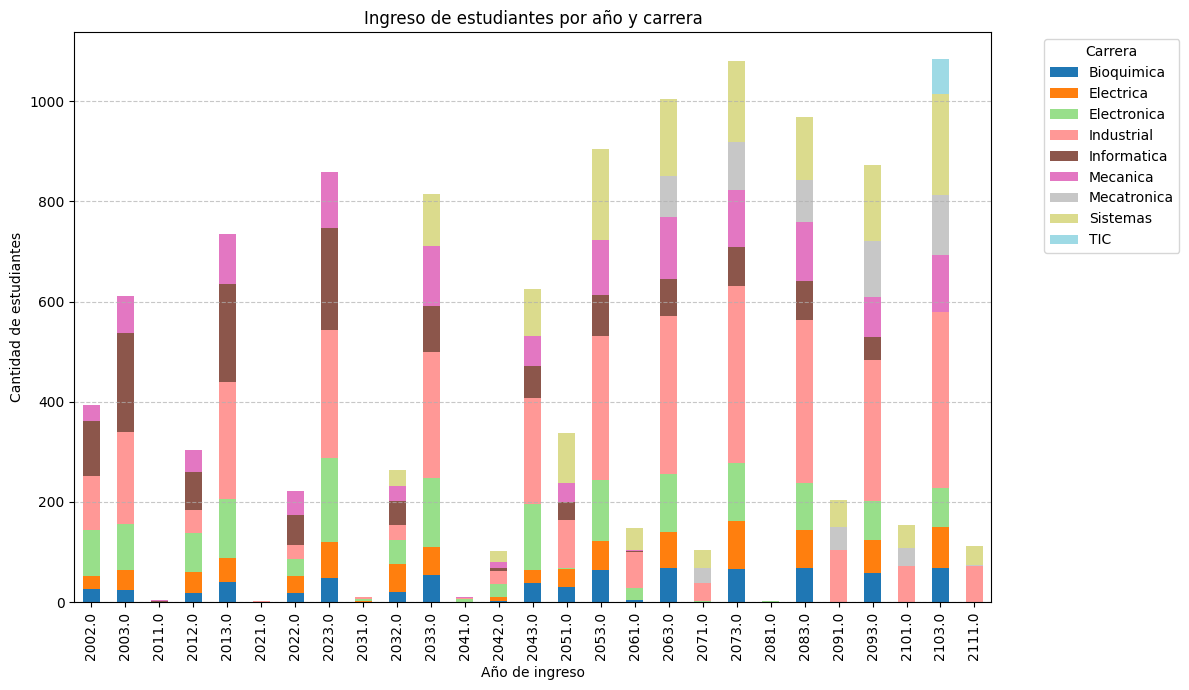

In [35]:
# Análisis 3: Ingreso por año por carrera

# Unir estudiantes con carreras para obtener el nombre
df_estudiantes_carrera = dfestudiantes.merge(dfcarrera, left_on='clave_carrera', right_on='clave_carrera', how='left')

# Agrupar por año de ingreso y nombre de carrera
ingreso_por_anio_carrera = df_estudiantes_carrera.groupby(['ingreso', 'corto']).size().unstack(fill_value=0)

# Mostrar la tabla de ingresos por año por carrera
display(ingreso_por_anio_carrera)

# Gráfica de barras apiladas
ingreso_por_anio_carrera.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20')
plt.title('Ingreso de estudiantes por año y carrera')
plt.xlabel('Año de ingreso')
plt.ylabel('Cantidad de estudiantes')
plt.legend(title='Carrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Población por sexo por carrera

sexo,Hombre,Mujer
corto,,
Bioquimica,303,422
Electrica,872,22
Electronica,1483,82
Industrial,2398,1359
Informatica,902,543
Mecanica,1283,46
Mecatronica,556,47
Sistemas,1244,305
TIC,48,21


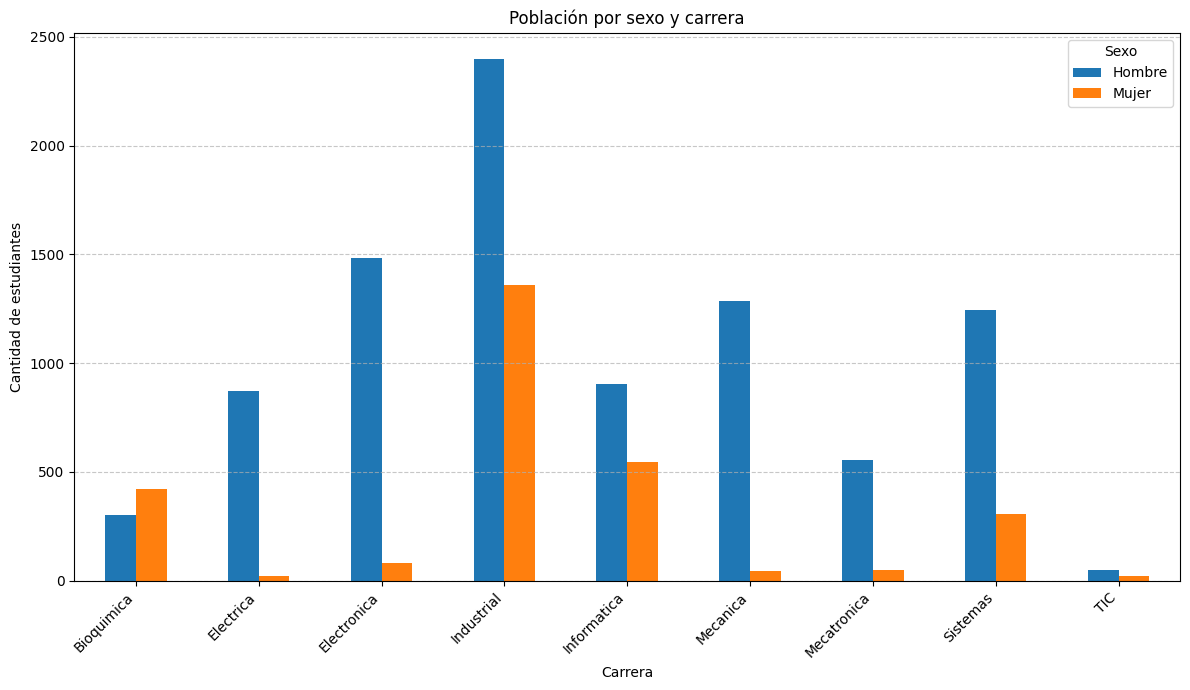

In [40]:
# Análisis 5: Población por sexo por carrera

# Unir estudiantes con información de carrera
df_sexo_carrera = dfestudiantes.merge(dfcarrera, on='clave_carrera', how='left')

# Agrupar por carrera y sexo
poblacion_sexo_carrera = df_sexo_carrera.groupby(['corto', 'sexo']).size().unstack(fill_value=0)

# Mostrar tabla
display(poblacion_sexo_carrera)

# Gráfica de barras agrupadas por sexo
poblacion_sexo_carrera.plot(kind='bar', figsize=(12, 7))
plt.title('Población por sexo y carrera')
plt.xlabel('Carrera')
plt.ylabel('Cantidad de estudiantes')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sexo')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
dfestudiantes['sexo'] = dfestudiantes['sexo'].map({1: 'Hombre', 2: 'Mujer'})


# Promedio por sexo por carrera 

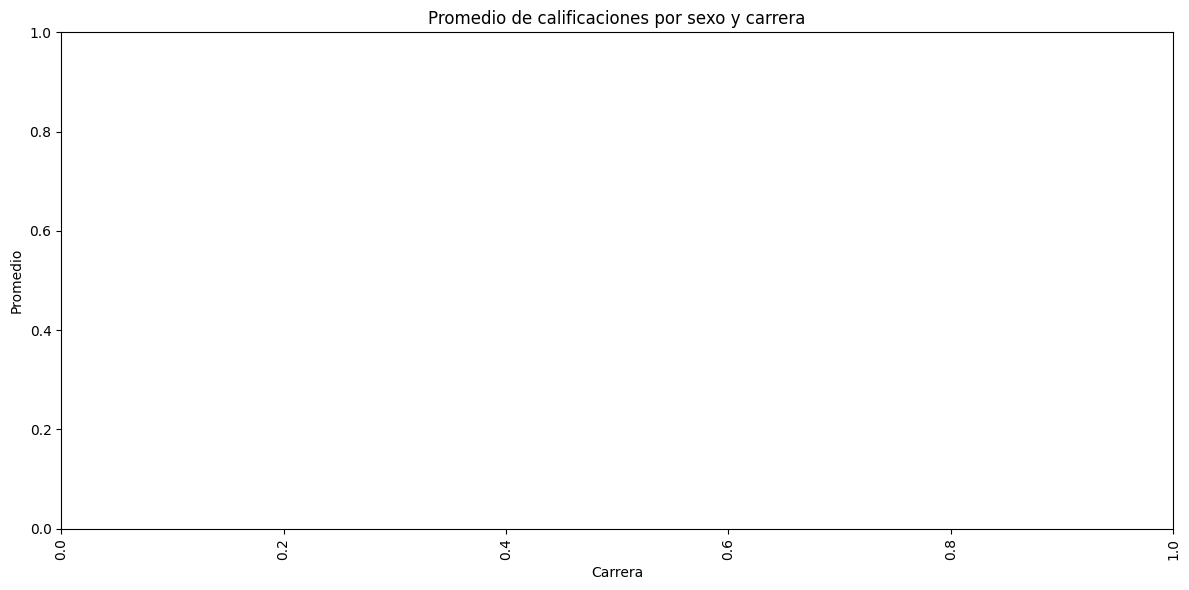

In [44]:
# Análisis 6: Promedio de calificaciones por sexo por carrera

sexo_promedio = df_merged.groupby(['nombre', 'sexo'])['calificacion'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=sexo_promedio, x='nombre', y='calificacion', hue='sexo')
plt.xticks(rotation=90)
plt.title('Promedio de calificaciones por sexo y carrera')
plt.ylabel('Promedio')
plt.xlabel('Carrera')
plt.tight_layout()
plt.show()



# Promedios por carrera por año 

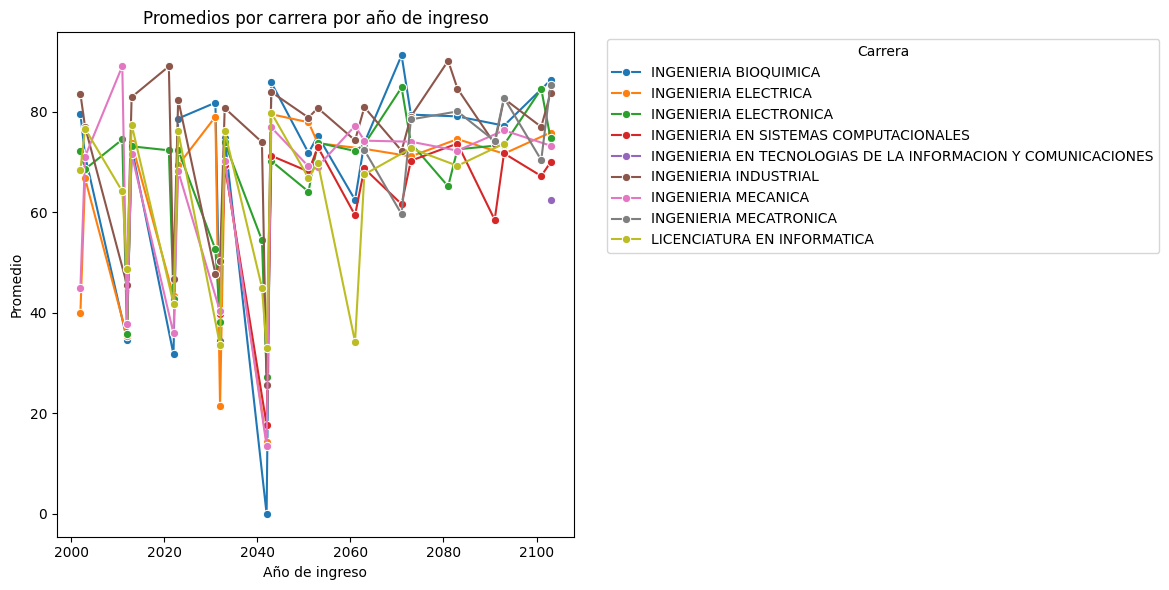

In [45]:
carrera_anio = df_merged.groupby(['nombre', 'ingreso'])['calificacion'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(data=carrera_anio, x='ingreso', y='calificacion', hue='nombre', marker="o")
plt.title('Promedios por carrera por año de ingreso')
plt.ylabel('Promedio')
plt.xlabel('Año de ingreso')
plt.legend(title='Carrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Cambio de promedios por semestre por carrera  
- Gráfica de líneas
- Promedio por carreras

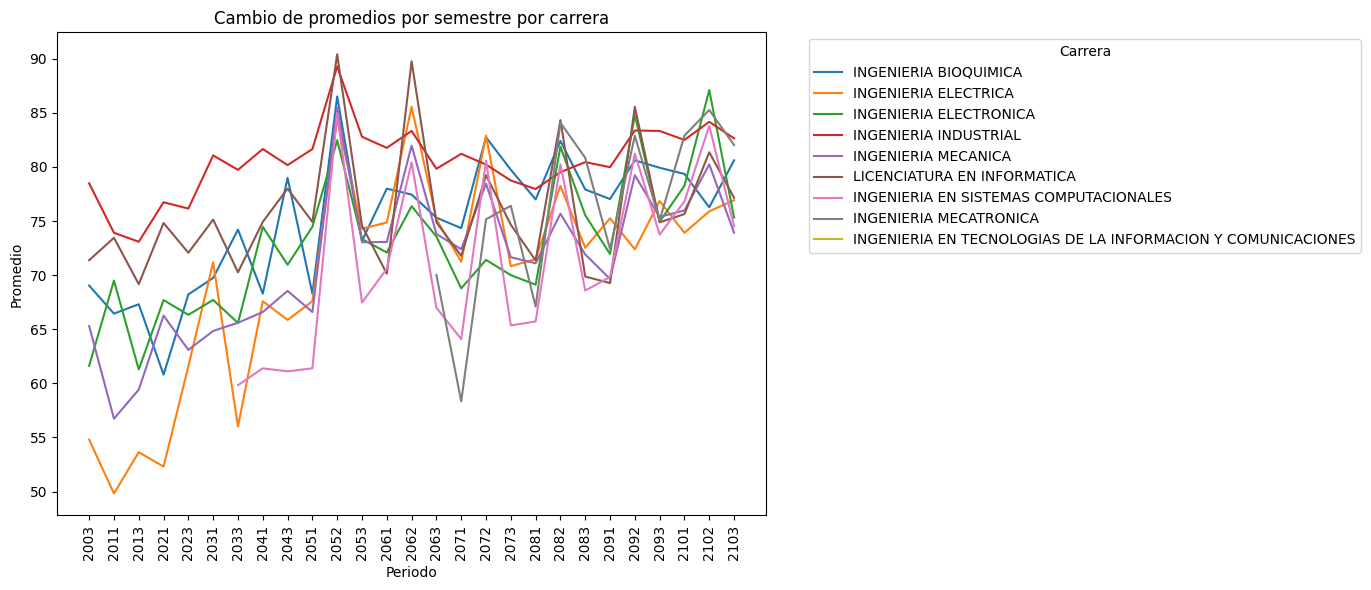

In [46]:
df_merged['periodo'] = df_merged['periodo'].astype(str)  # Asegurarse de que sea cadena para orden
prom_semestre = df_merged.groupby(['periodo', 'nombre'])['calificacion'].mean().reset_index()
plt.figure(figsize=(14,6))
sns.lineplot(data=prom_semestre, x='periodo', y='calificacion', hue='nombre')
plt.xticks(rotation=90)
plt.title('Cambio de promedios por semestre por carrera')
plt.ylabel('Promedio')
plt.xlabel('Periodo')
plt.legend(title='Carrera', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
